# Case study on Breast Cancer Detection

## Problem Statement

Predict the type of Breast Cancer (M = malignant and B= benign) in the Breast Cancer Wisconsin(Diagnostic)Data Set.

### Objective

To detect type of Breast Cancer using KNN

### Attributes

a) radius (mean of distance from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2/ area - 1.0)

g) concavity (severity of concave portions of the contour 

h) concave points(number of concave portions of the contour)

i) symmetry

j)fractal dimensions ("coastline approximation" -1)

The mean,standard deviation and worst or largest (mean of three largest values) of these features were computed for each image , resulting in 30 features. For instance , field 3 is mean radius , field 13 radius standard deviation etc. 

1. id
2. diagnosis
3. radius_mean
4. texture_mean
5. perimeter_mean
6. area_mean
7. smoothness_mean
8. compactness_mean
9. concavity_mean
10. points_mean
11. symmetry_mean
12. dimension
13. radius_se
14. texture_se
15. perimeter_se
16. area_se
17. smoothness_se
18. compactness_se
19. concavity_Se
20. points_se
21. symmnetry_se
22. dimension_se
23. radius_worst
24. texture_worst
25. perimeter_worst
26. area_worst
27. smoothness_worst
28. compactness_worst
29. concavity_worst
30. points_worst
31. symmetry_worst
32. dimension_worst



### Table of Content

1.Import Libraries

2.Setting options

3.Read Data

4.Data Analysis and Preparation

4.1 - Understanding the Dataset

    4.1.1 - Data Types
    
    4.1.2 - Summary Statistics
    
    4.1.3 - Missing Value check
    
    4.1.4 - Discover Outliers with Visualization
    
5.Univariate Analysis

6.Multivariate Analysis 6.1 - Visualizing features having strongest relation with target variable

7.Creating KNN Model

8.Standardizing the data

9.Conclusion and Interpretation



### Importing Necessary Libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
from sklearn import preprocessing
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier


### Setting Options

In [35]:
# suppress display of warnings
warnings.filterwarnings('ignore')

### Reading data

In [36]:
df = pd.read_csv('wisc_bc_data.csv')

### Data Analysis and Data Preparation

In [37]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  87139402         B        12.32         12.39           78.85      464.1   
1   8910251         B        10.60         18.95           69.28      346.4   
2    905520         B        11.04         16.83           70.92      373.2   
3    868871         B        11.28         13.39           73.00      384.8   
4   9012568         B        15.19         13.21           97.65      711.8   

   smoothness_mean  compactness_mean  concavity_mean  points_mean  ...  \
0          0.10280           0.06981         0.03987      0.03700  ...   
1          0.09688           0.11470         0.06387      0.02642  ...   
2          0.10770           0.07804         0.03046      0.02480  ...   
3          0.11640           0.11360         0.04635      0.04796  ...   
4          0.07963           0.06934         0.03393      0.02657  ...   

   radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0         13.50          15.64            86.97       549.1            0.1385   
1         11.88          22.94            78.28       424.8            0.1213   
2         12.41          26.44            79.93       471.4            0.1369   
3         11.92          15.77            76.53       434.0            0.1367   
4         16.20          15.73           104.50       819.1            0.1126   

   compactness_worst  concavity_worst  points_worst  symmetry_worst  \
0             0.1266          0.12420       0.09391          0.2827   
1             0.2515          0.19160       0.07926          0.2940   
2             0.1482          0.10670       0.07431          0.2998   
3             0.1822          0.08669       0.08611          0.2102   
4             0.1737          0.13620       0.08178          0.2487   

   dimension_worst  
0          0.06771  
1          0.07587  
2          0.07881  
3          0.06784  
4          0.06766  

[5 rows x 32 columns]

In [38]:
df.shape

(569, 32)

In [39]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [40]:
df.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [41]:
df.duplicated().sum()

0

In [42]:
#Summary Statistics
df.describe().transpose()

count          mean           std          min  \
id                 569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean        569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean       569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean     569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean          569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean    569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean   569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean     569.0  8.879932e-02  7.971981e-02     0.000000   
points_mean        569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean      569.0  1.811619e-01  2.741428e-02     0.106000   
dimension_mean     569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se          569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se         569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se       569.0  2.866059e+00  2.021855e+00     0.757000   
area_se            569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se      569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se     569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se       569.0  3.189372e-02  3.018606e-02     0.000000   
points_se          569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se        569.0  2.054230e-02  8.266372e-03     0.007882   
dimension_se       569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst       569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst      569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst    569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst         569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst   569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst  569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst    569.0  2.721885e-01  2.086243e-01     0.000000   
points_worst       569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst     569.0  2.900756e-01  6.186747e-02     0.156500   
dimension_worst    569.0  8.394582e-02  1.806127e-02     0.055040   

                             25%            50%           75%           max  
id                 869218.000000  906024.000000  8.813129e+06  9.113205e+08  
radius_mean            11.700000      13.370000  1.578000e+01  2.811000e+01  
texture_mean           16.170000      18.840000  2.180000e+01  3.928000e+01  
perimeter_mean         75.170000      86.240000  1.041000e+02  1.885000e+02  
area_mean             420.300000     551.100000  7.827000e+02  2.501000e+03  
smoothness_mean         0.086370       0.095870  1.053000e-01  1.634000e-01  
compactness_mean        0.064920       0.092630  1.304000e-01  3.454000e-01  
concavity_mean          0.029560       0.061540  1.307000e-01  4.268000e-01  
points_mean             0.020310       0.033500  7.400000e-02  2.012000e-01  
symmetry_mean           0.161900       0.179200  1.957000e-01  3.040000e-01  
dimension_mean          0.057700       0.061540  6.612000e-02  9.744000e-02  
radius_se               0.232400       0.324200  4.789000e-01  2.873000e+00  
texture_se              0.833900       1.108000  1.474000e+00  4.885000e+00  
perimeter_se            1.606000       2.287000  3.357000e+00  2.198000e+01  
area_se                17.850000      24.530000  4.519000e+01  5.422000e+02  
smoothness_se           0.005169       0.006380  8.146000e-03  3.113000e-02  
compactness_se          0.013080       0.020450  3.245000e-02  1.354000e-01  
concavity_se            0.015090       0.025890  4.205000e-02  3.960000e-01  
points_se               0.007638       0.010930  1.471000e-02  5.279000e-02  
symmetry_se             0.015160       0.018730  2.348000e-02  7.895000e-02  
dimension_se            0.002248       0.003187  4.558000e-03  2.984000e-02  
radius_worst           13.010000      14.970000  1.879000e+01  3.604000e+01  
texture_worst   

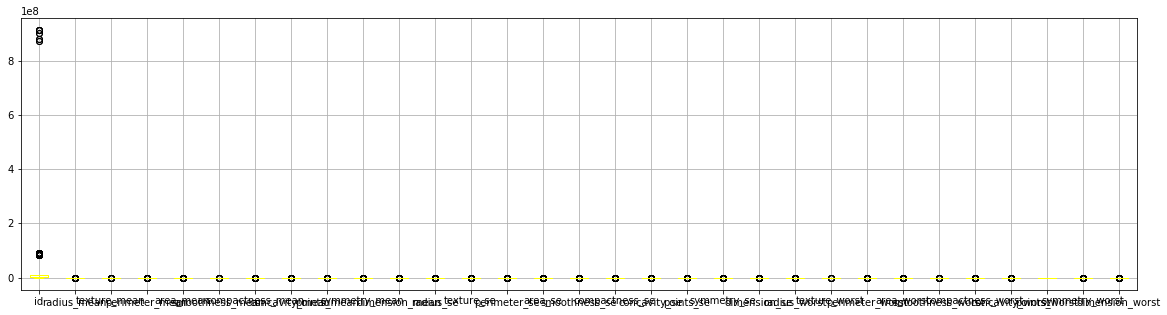

In [43]:
df.boxplot(figsize=(20,5),color= 'yellow')

In [44]:
#Number of outliers
col_val = ['id', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius
           _se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst']

for i in col_val:
    print('No. of outliers in {} is {}'.format(i, df[((df[i]-df[i].mean())/df[i].std()).abs() > 3][i].count()))

No. of outliers in id is 11
No. of outliers in radius_mean is 5
No. of outliers in texture_mean is 4
No. of outliers in perimeter_mean is 7
No. of outliers in area_mean is 8
No. of outliers in smoothness_mean is 5
No. of outliers in compactness_mean is 9
No. of outliers in concavity_mean is 9
No. of outliers in points_mean is 6
No. of outliers in symmetry_mean is 5
No. of outliers in dimension_mean is 7
No. of outliers in radius_se is 7
No. of outliers in texture_se is 9
No. of outliers in perimeter_se is 8
No. of outliers in area_se is 6
No. of outliers in smoothness_se is 7
No. of outliers in compactness_se is 12
No. of outliers in concavity_se is 6
No. of outliers in points_se is 6
No. of outliers in symmetry_se is 11
No. of outliers in dimension_se is 10
No. of outliers in radius_worst is 6
No. of outliers in texture_worst is 4
No. of outliers in perimeter_worst is 6
No. of outliers in area_worst is 10
No. of outliers in smoothness_worst is 3
No. of outliers in compactness_worst is

There are lot of outliers in this dataset. We can treat it further to achiver more performance.

In [45]:
#Converting categorical column
df['diagnosis'] = df.diagnosis.astype('category')
df['diagnosis'].dtypes

CategoricalDtype(categories=['B', 'M'], ordered=False)

In [46]:
df.groupby(["diagnosis"]).count()

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
diagnosis                                                              
B          357          357           357             357        357   
M          212          212           212             212        212   

           smoothness_mean  compactness_mean  concavity_mean  points_mean  \
diagnosis                                                                   
B                      357               357             357          357   
M                      212               212             212          212   

           symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
diagnosis                 ...                                                 
B                    357  ...           357            357              357   
M                    212  ...           212            212              212   

           area_worst  smoothness_worst  compactness_worst  concavity_worst  \
diagnosis                                                                     
B                 357               357                357              357   
M                 212               212                212              212   

           points_worst  symmetry_worst  dimension_worst  
diagnosis                                                 
B                   357             357              357  
M                   212             212              212  

[2 rows x 31 columns]

Class distribution among B and M is almost 2:1. The model will better predict B and M

### Univariate Analysis

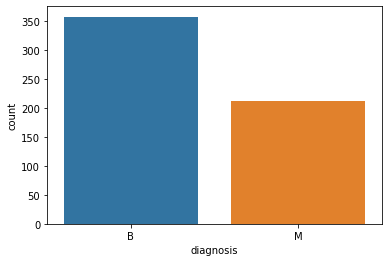

In [47]:
sns.countplot(df['diagnosis'])

In [48]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### Multivaraiate Analysis

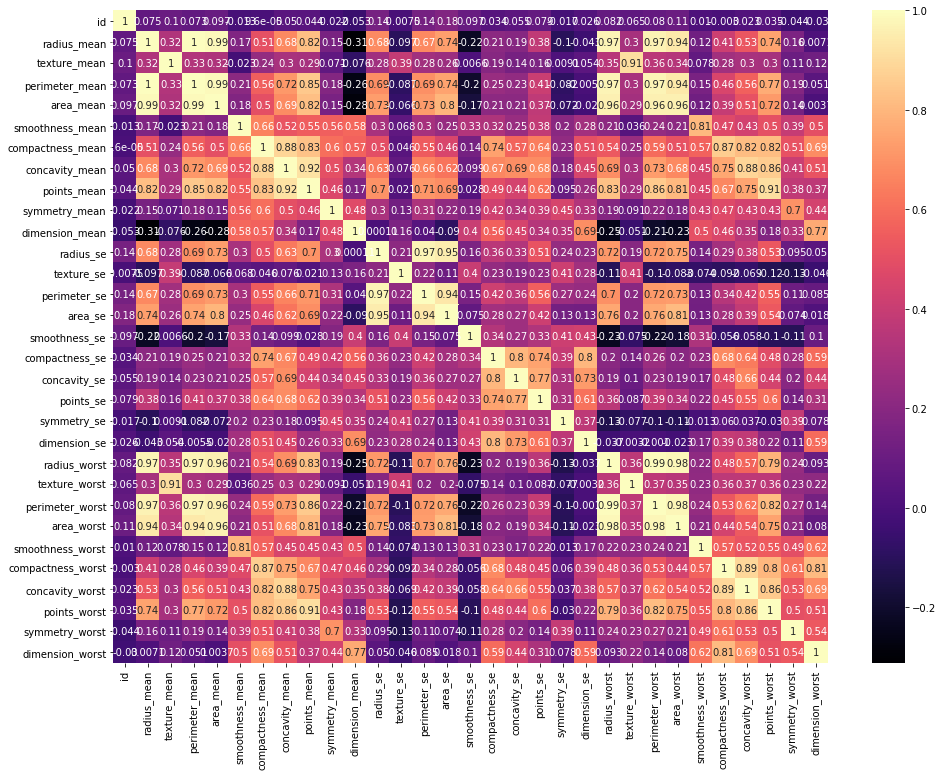

In [49]:
#chekcing correlation between independent varaibles
cor = df.corr()
plt.figure(figsize=(16,12))
sns.heatmap(cor, xticklabels=cor.columns, yticklabels= cor.columns,annot= True,cmap='magma')

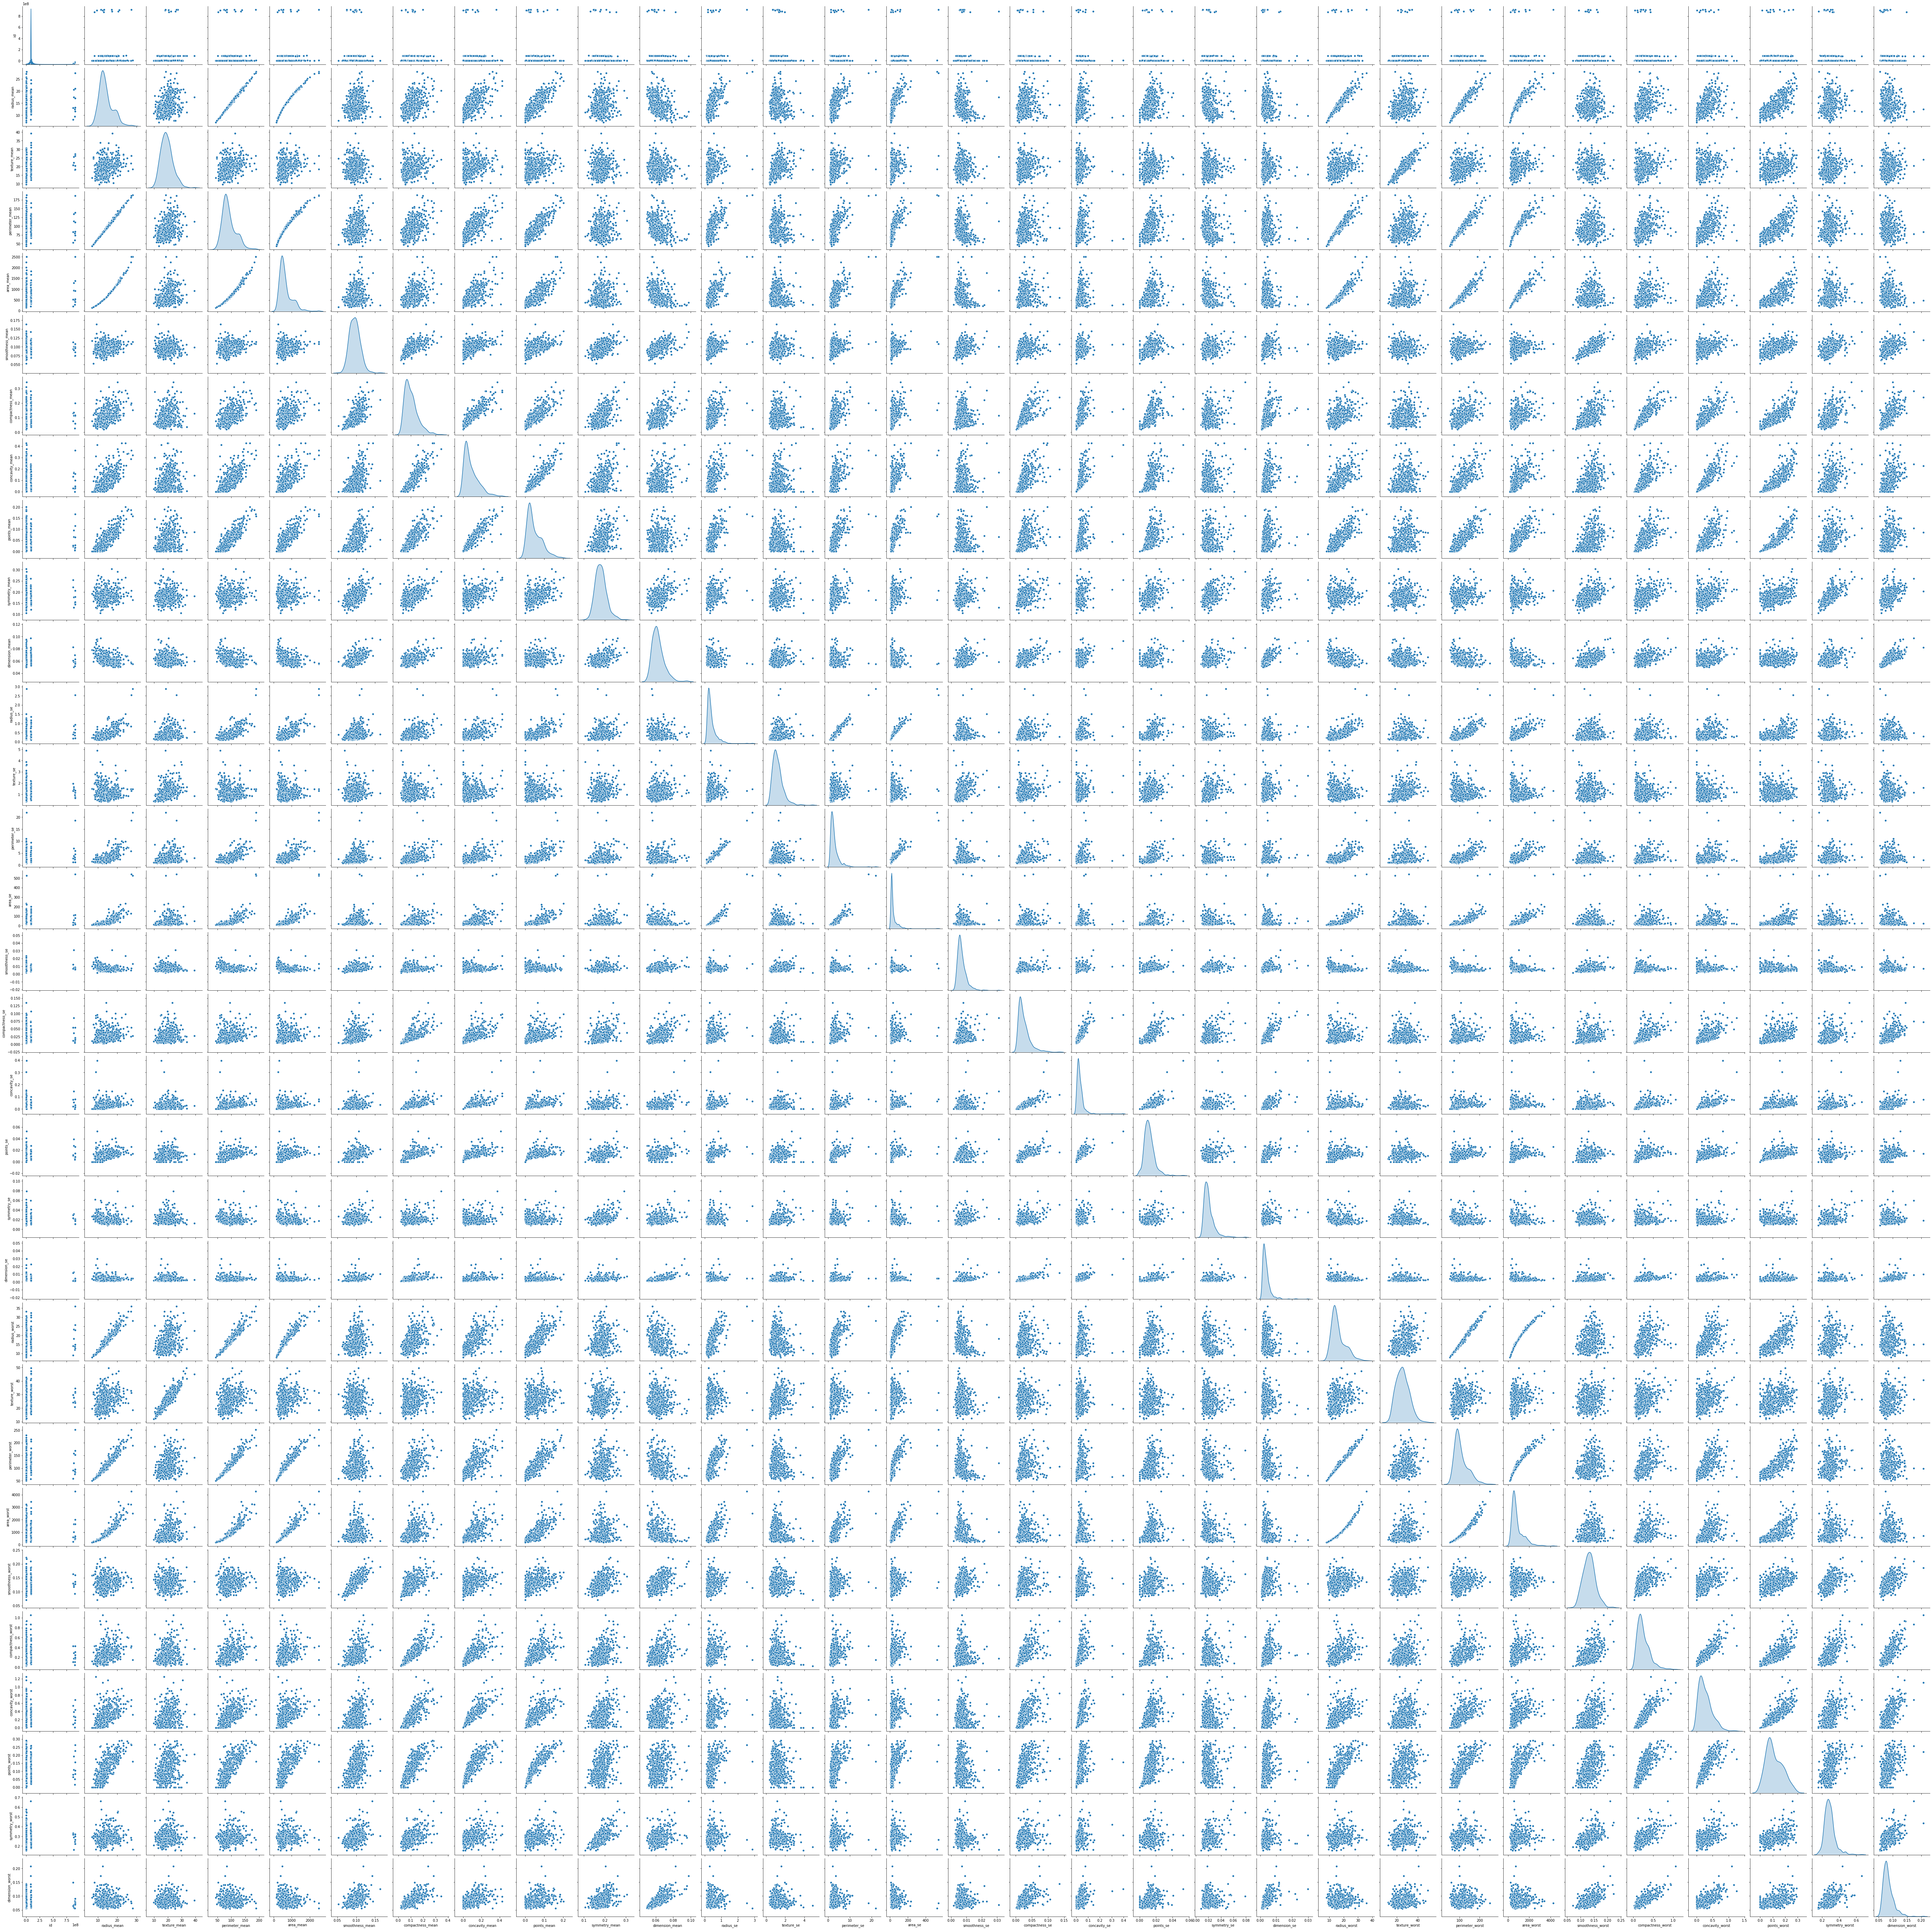

In [50]:
sns.pairplot(df,diag_kind='kde')

By looking at the heatmap, we can observe that there is a high correlation between :

  area_mean and perimeter_mean and vice versa
  
  radius_mean and area_mean and vice versa
  
  radius_se and perimeter_se and vice_versa
  
  radius_worst and perimeter_worst and vice_versa

### Splitting dataset

In [56]:
#Independent Variables
X = df.drop(['id','diagnosis'],axis =1)

#Dependent Variables
y = df['diagnosis']

#Standardizing data
X_std = X.apply(zscore)
X_std.columns = X.columns

#Splitting the data into training and test set in the ratio of 70:30
X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.30,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

### Creating Model

In [75]:
#Creating model

#Instantiating with 3 neighbors
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train,y_train)

#predicting on test data
pred = knn3.predict(X_test)

#Evaluating accuracy
print('On test data when k=3',knn3.score(X_test,y_test))

#When k=5
knn5 = KNeighborsClassifier(n_neighbors=3)
knn5.fit(X_train,y_train)
print('On test data when k=5',knn5.score(X_test,y_test))


#When k=9
knn9 = KNeighborsClassifier(n_neighbors=3)
knn9.fit(X_train,y_train)
print('On test data when k=9',knn9.score(X_test,y_test))

On test data when k=3 0.9766081871345029
On test data when k=5 0.9766081871345029
On test data when k=9 0.9766081871345029


Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from the above list using the Misclassification error

In [59]:
#Creating ODD list of K for KNN

mylist = (range(1,20))

#sunbsetting only odd ones
neighbors = list(filter(lambda x: x%2 != 0,mylist))
neighbors

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [60]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 3


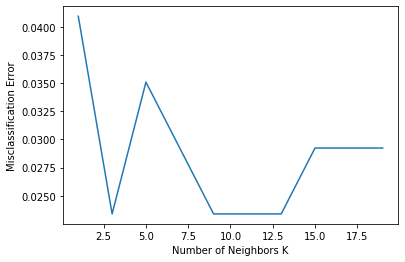

In [61]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [69]:
#Use k=3 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))
# print(recall_score(y_test, y_pred))

0.9766081871345029


So, 97% of our predictions are correct, which is very good.

Confusion Matrix


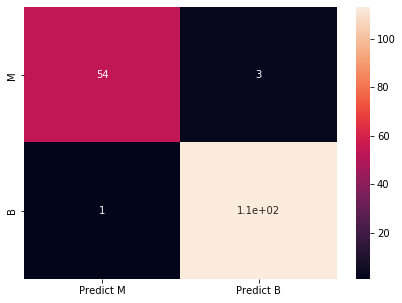

In [74]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_pred, labels=["M", "B"])

df_cm = pd.DataFrame(cm, index = [i for i in ["M","B"]],
                  columns = [i for i in ["Predict M","Predict B"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

The confusion matrix

True Positives (TP): we correctly predicted that 112 cases are Benign and that were actually Benign.
                     we correctly predicted that 54 cases are Malignant and that were actually Malignant.

False Positives (FP): we incorrectly predicted 1 case as Malignant and was actually Benign and 3 case as Benign but in actual it was Malignant. which is Benign but it is not (a "Type I error") Falsely predict positive Type I error


### Conclusion and Interpretation

The accuracy of model is very good in predicting correct cases. Overall we just incorrectly predicted only 4 cases.